## Project Description
Halo, saya Hansen Kallista dan pada Final Project 3 ini, saya menggunakan kasus sebuah data cuaca di negara Australia. Menggunakan Weather_AUS Dataset dengan besar 145460 baris dan 23 kolom. Saya akan mencoba menggunakan Logistic Regresion dan Support Vector Machine Classification untuk diterapkan pada kasus ini.

### Persiapan Awal dan Import Library

In [36]:
# Library untuk melaukan proses data
import pandas as pd
import numpy as np

# Library untuk melakukan visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk melakukan Modeling dan Training data
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from scipy import stats
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Data Loading

In [37]:
df_au_weather = pd.read_csv('dataset/weatherAUS.csv')

In [38]:
df_au_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [39]:
df_au_weather.shape

(145460, 23)

In [40]:
df_au_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [41]:
df_au_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


### Data Cleaning

In [42]:
# Melakukan drop pada kolom yang tidak digunakan
df_au_weather = df_au_weather.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
df_au_weather.shape

(145460, 17)

In [43]:
df_au_weather.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [44]:
# Melakukan pembersihan pada missing value dalam dataset
df_au_weather = df_au_weather.dropna(how = 'any')
df_au_weather.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Visualisasi Data

<AxesSubplot: xlabel='MaxTemp', ylabel='MinTemp'>

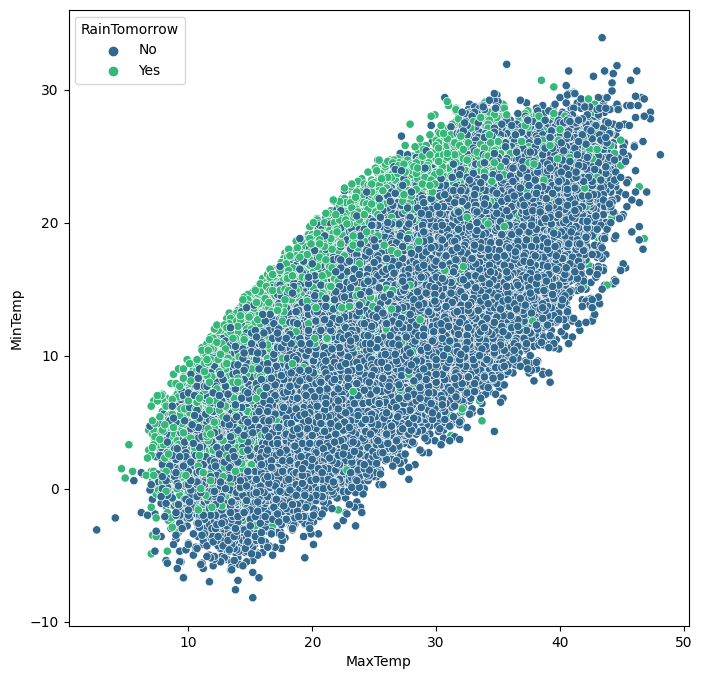

In [45]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'viridis', data = df_au_weather)

<AxesSubplot: xlabel='Humidity9am', ylabel='Temp9am'>

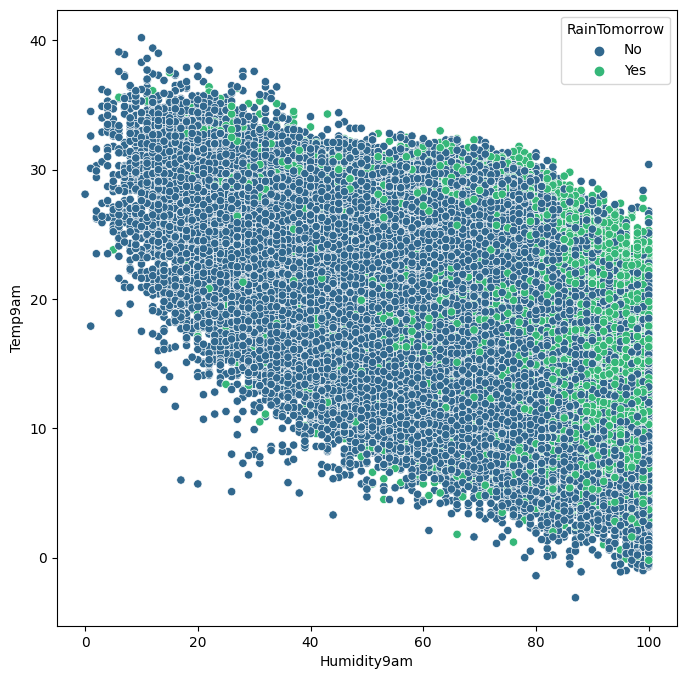

In [46]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', palette = 'viridis', data = df_au_weather)

### Correlation Heat Map

/var/folders/8k/5wzf43bs68dbx42d9h_wh6b00000gn/T/ipykernel_3626/2387512986.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_au_weather.corr())


<AxesSubplot: >

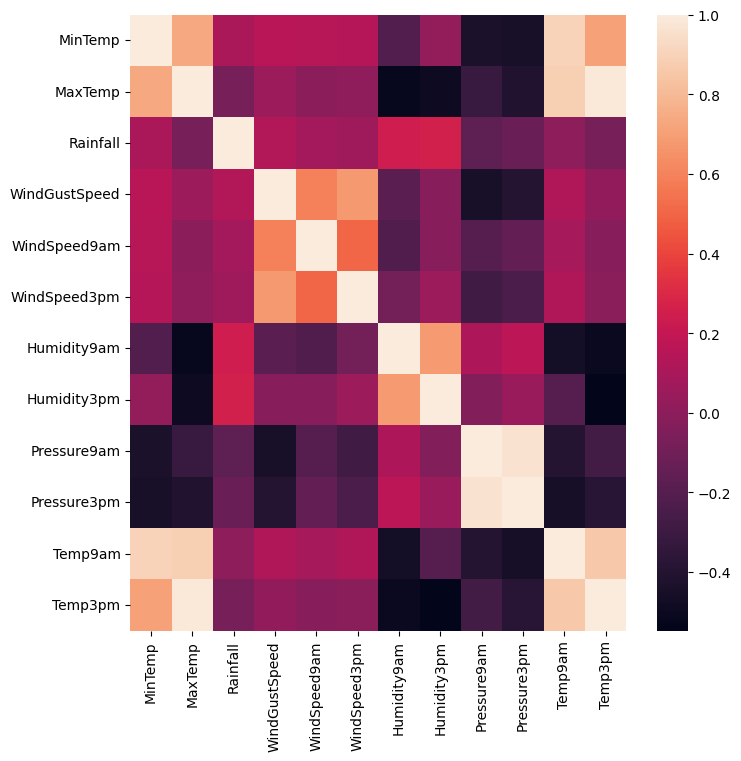

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(df_au_weather.corr())

### Dealing with Outliers

In [48]:
# Menggunakan Z-score untuk menemukan data outlier
z = np.abs(stats.zscore(df_au_weather._get_numeric_data()))
print(z)
df_au_weather = df_au_weather[(z < 3).all(axis=1)]
print(df_au_weather.shape)

         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.117567  0.108221  0.206661       0.241214      0.577742   
1       0.841802  0.206845  0.276405       0.241214      1.339742   
2       0.037620  0.292772  0.276405       0.391345      0.457900   
3       0.553991  0.622159  0.276405       1.260094      0.500842   
4       0.773137  1.237969  0.160165       0.016018      0.980214   
...          ...       ...       ...            ...           ...   
145454  1.465392  0.265754  0.276405       0.734636      0.021471   
145455  1.577319  0.036615  0.276405       0.734636      0.261157   
145456  1.449403  0.235487  0.276405       1.410225      0.261157   
145457  1.161592  0.464626  0.276405       0.284243      0.740528   
145458  0.777844  0.478947  0.276405       0.959832      0.261157   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.524408     0.190140     1.380413     1.382962     1.142455   
1           0.29131

In [49]:
# Melakukan encoding data
df_au_weather['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df_au_weather['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df_au_weather[col]))

df_au_weather = pd.get_dummies(df_au_weather, columns = categorical_columns)
df_au_weather.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,1,0,0,0,0,0,0


In [50]:
# Melakukan standarisasi data
scaler = preprocessing.MinMaxScaler()
scaler.fit(df_au_weather)
df_au_weather = pd.DataFrame(scaler.transform(df_au_weather), index=df_au_weather.index, columns=df_au_weather.columns)
df_au_weather.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

In [51]:
X = df_au_weather.loc[:,df_au_weather.columns!='RainTomorrow']
y = df_au_weather[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [52]:
df_au_weather = df_au_weather[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]
X = df_au_weather[['Humidity3pm']] 
y = df_au_weather[['RainTomorrow']]

In [53]:
# Data splitting, training dan testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Data Training with Algoritms

In [54]:
# Logistig Regression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression:',score)

Accuracy of Logistic Regression: 0.8356972899477766


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# Support Vector Machine
svc = svm.SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy of Support Vector Machine:',score)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Support Vector Machine: 0.7931151694941442


### Kesimpulan Akhir
Berdasarkan hasil diatas, Algoritma Logistic Regression berhasil mendapatkan skor akurasi sebesar 83.56%, sedangkan algoritma Support Vector lebih rendah dengan skor akurasi sebesar 79.31%. Namun, terdapat 1 hal lain yang cukup berdampak besar yaitu waktu eksekusi, dimana algoritma Logistic Regression memiliki waktu eksekusi yang jauh lebih singkat dibandingkan dengan algoritma Support Vector. Maka dari itu algoritma Logistic Regression lebih cocok untuk digunakan pada dataset ini dibanding dengan algoritma Support Vector Machine.